In [377]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# seed to maintain the results
np.random.seed(10)

# Ignore Future Warnings
import warnings
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

### Dataset Import

Import the and merge individual monthly datasets into one dataFrame ```bike_data```

In [378]:
df1 = pd.read_csv('data/201901-bluebikes-tripdata.csv')
df2 = pd.read_csv('data/201902-bluebikes-tripdata.csv')
df3 = pd.read_csv('data/201903-bluebikes-tripdata.csv')
df4 = pd.read_csv('data/201904-bluebikes-tripdata.csv')
df5 = pd.read_csv('data/201905-bluebikes-tripdata.csv')
df6 = pd.read_csv('data/201906-bluebikes-tripdata.csv')
df7 = pd.read_csv('data/201907-bluebikes-tripdata.csv')
df8 = pd.read_csv('data/201908-bluebikes-tripdata.csv')
df9 = pd.read_csv('data/201909-bluebikes-tripdata.csv')
df10 = pd.read_csv('data/201910-bluebikes-tripdata.csv')
df11 = pd.read_csv('data/201911-bluebikes-tripdata.csv')
df12 = pd.read_csv('data/201912-bluebikes-tripdata.csv')

Merge the dataset using the ```concat``` pandas method

In [379]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])

Exporting the merged dataset and make a copy of the original dataset

In [380]:
df.to_csv('bike_data_2019.csv', index=False)

df_bike_data = df.copy()

### Dataset Description

**Shape**, **Number of Features**, **Descriptive Statistics** of the dataset

Show the Shape of the dataset

In [381]:
df_bike_data.shape

(2522771, 15)

Show the detailed information on the merged dataset

In [382]:
df_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2522771 entries, 0 to 92207
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 308.0+ MB


Viewing the Features/Columns within the dataset

In [383]:
df_bike_data.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

Preview the dataset

In [384]:
df_bike_data.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,371,2019-01-01 00:09:13.7980,2019-01-01 00:15:25.3360,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1987,1
1,264,2019-01-01 00:33:56.1820,2019-01-01 00:38:20.8800,117,Binney St / Sixth St,42.366162,-71.086883,189,Kendall T,42.362428,-71.084955,4142,Subscriber,1990,1
2,458,2019-01-01 00:41:54.6000,2019-01-01 00:49:33.2730,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1628,Subscriber,1977,1


Dataset Description Statistics

In [385]:
df_bike_data.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06
mean,2.178407e+03,1.423010e+02,4.235746e+01,-7.108794e+01,1.416275e+02,4.235732e+01,-7.108749e+01,3.637649e+03,1.984724e+03,1.124730e+00
std,1.098031e+05,1.183249e+02,5.584549e-02,9.302137e-02,1.180612e+02,7.722553e-02,1.291085e-01,1.287294e+03,1.154858e+01,5.738727e-01
min,6.100000e+01,1.000000e+00,0.000000e+00,-7.116649e+01,1.000000e+00,0.000000e+00,-7.116649e+01,1.000000e+00,1.886000e+03,0.000000e+00
25%,4.180000e+02,5.500000e+01,4.234871e+01,-7.110441e+01,5.400000e+01,4.234871e+01,-7.110441e+01,2.745000e+03,1.977000e+03,1.000000e+00
50%,7.070000e+02,9.900000e+01,4.235810e+01,-7.108981e+01,9.800000e+01,4.235810e+01,-7.108822e+01,3.670000e+03,1.989000e+03,1.000000e+00
75%,1.185000e+03,1.900000e+02,4.236599e+01,-7.106892e+01,1.900000e+02,4.236599e+01,-7.106781e+01,4.497000e+03,1.994000e+03,1.000000e+00
max,4.256714e+07,4.460000e+02,4.241480e+01,0.000000e+00,4.460000e+02,4.241480e+01,0.000000e+00,6.173000e+03,2.003000e+03,2.000000e+00


**Important Features identified**

- tripduration
- start station id
- bikeid
- birth year	

#### New Features **Important Features identified**

Addition of new features based on the ```starttime``` feature

In [386]:
# Check data types
df_bike_data.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
dtype: object

In [387]:
# Convert the starttime to a datetime format

df_bike_data['starttime'] = pd.to_datetime(df_bike_data['starttime'])

In [388]:
# Check data types
df_bike_data.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                           object
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                          int64
gender                              int64
dtype: object

Add more features based on ```starttime```

In [389]:
df_bike_data["startTimeDate"] = df_bike_data['starttime'].dt.date
# df_bike_data["startTripYear"] = df_bike_data['starttime'].dt.year
df_bike_data["startTripMonth"] = df_bike_data['starttime'].dt.month
df_bike_data["startTripDay"] = df_bike_data['starttime'].dt.day
df_bike_data["startTripDayOfWeek"] = df_bike_data['starttime'].dt.dayofweek

Add ```userAge``` Feature calculated from the ```birth Year``` feature as of 2019

In [390]:
df_bike_data["userAge"] = 2019 - df_bike_data['birth year']

### Data Cleaning

Find the number of missing values in each column

In [391]:
missing_values = df_bike_data.isnull().sum()
pd.DataFrame(missing_values)

,0
tripduration,0
starttime,0
stoptime,0
start station id,0
start station name,0
start station latitude,0
start station longitude,0
end station id,0
end station name,0
end station latitude,0


Visualising the entire dataset to determine correlation

In [392]:
# Calculating the Correlation Matrix
df_corr = df_bike_data.corr()
df_corr

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,startTripMonth,startTripDay,startTripDayOfWeek,userAge
tripduration,1.000000,0.004388,-0.003080,0.001103,-0.002199,0.000394,0.000715,-0.003384,-0.009130,-0.013515,-0.000808,0.000054,0.004208,0.009130
start station id,0.004388,1.000000,0.014424,-0.007789,0.050073,0.005966,0.000510,0.024753,0.005220,0.003564,0.069341,0.005229,0.012418,-0.005220
start station latitude,-0.003080,0.014424,1.000000,-0.937367,0.010006,0.205009,-0.177222,-0.001667,-0.000099,0.008847,-0.002819,-0.001144,-0.001168,0.000099
start station longitude,0.001103,-0.007789,-0.937367,1.000000,0.001220,-0.177362,0.199826,-0.000630,-0.037866,-0.017687,-0.005477,0.001775,-0.008589,0.037866
end station id,-0.002199,0.050073,0.010006,0.001220,1.000000,0.008487,-0.003454,0.023135,0.003164,0.003910,0.065823,0.004068,0.008710,-0.003164
end station latitude,0.000394,0.005966,0.205009,-0.177362,0.008487,1.000000,-0.967344,-0.000472,-0.001424,0.007536,-0.002133,-0.001572,-0.001406,0.001424
end station longitude,0.000715,0.000510,-0.177222,0.199826,-0.003454,-0.967344,1.000000,-0.001025,-0.025711,-0.011987,-0.004372,0.002034,-0.005132,0.025711
bikeid,-0.003384,0.024753,-0.001667,-0.000630,0.023135,-0.000472,-0.001025,1.000000,0.016925,0.028889,0.311131,0.024651,0.009248,-0.016925
birth year,-0.009130,0.005220,-0.000099,-0.037866,0.003164,-0.001424,-0.025711,0.016925,1.000000,0.328708,0.071290,-0.003339,0.006018,-1.000000
gender,-0.013515,0.003564,0.008847,-0.017687,0.003910,0.007536,-0.011987,0.028889,0.328708,1.000000,0.021988,-0.003887,-0.065935,-0.328708


The Correlation **Heatmap**

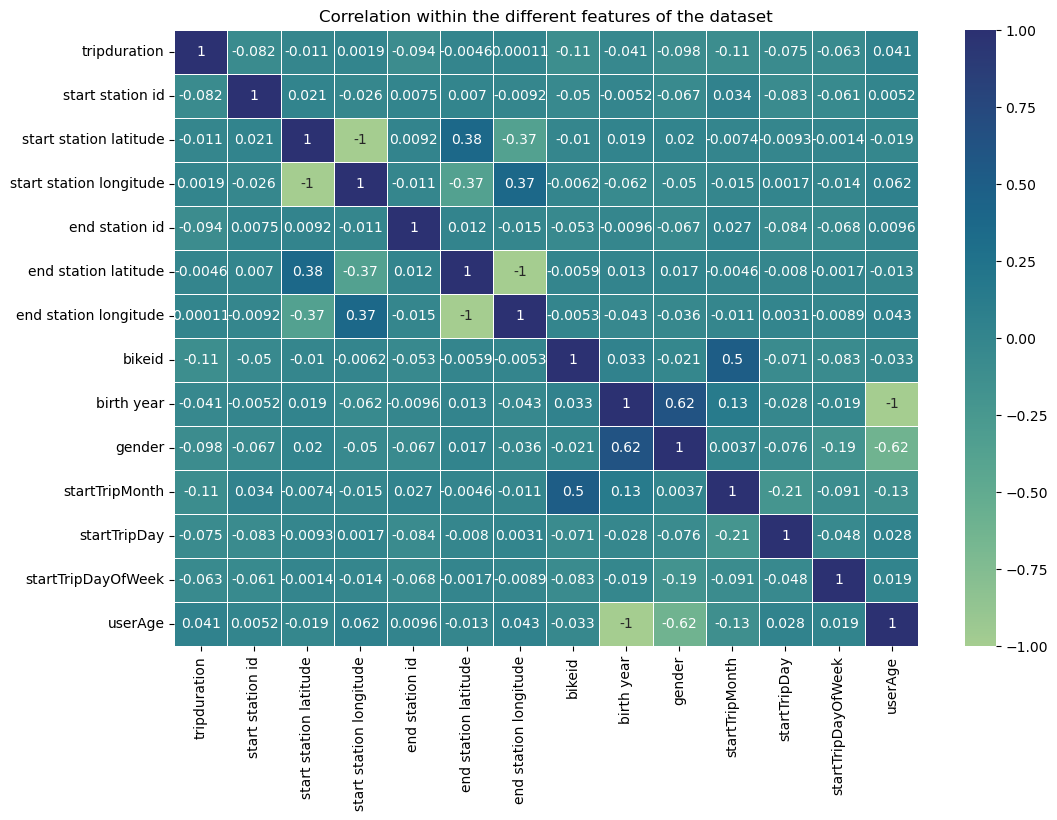

In [393]:
# Heatmap
plt.figure(figsize=(12,8))
plt.title("Correlation within the different features of the dataset")
plt.xlabel('Features')
plt.ylabel('Features')
sns.heatmap(df_corr.corr(), cbar=True, linewidths=0.5, cmap="crest", annot=True)
plt.show();

#### Detecting outliers using **IQR**

Selected Features
- birth Year
- tripduration

Identifying the outliers in the Raw dataset

- Using IQR
IQR tells how spread the middle values are. It can be used to tell when a value 
is too far from the middle.

- An outlier is a point which falls more than 1.5 times the interquartile range
above the third quartile or below the first quartile.

In [394]:
# method to detect outliers
def detect_outliers(df):
    """
    Detect outliers in the data using the interquartile range (IQR) method.
    Returns a DataFrame with the list of the columns considered for outliers and the q1, q3, IQR and the lower and upper bounds
    """
    # first and third quartiles
    q1, q3 = df.quantile([0.25, 0.75])

    # the IQR
    iqr = q3 - q1

    # lower and upper bounds
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)

    df_resp = [q1, q3, iqr, lower_bound, upper_bound]
    df_resp_cols = ["First Quartile q1", "Third Quartile q3", "Interquartile range IQR", "Lower bound", "Upper bound"]

    # Return pandas IQR dataframe 
    return pd.DataFrame(df_resp, df_resp_cols)

### Outliers - **Birth Year**

Detect outliers in the **birth Year** Feature

In [395]:
detect_outliers(df_bike_data['birth year'])

,0
First Quartile q1,1977.0
Third Quartile q3,1994.0
Interquartile range IQR,17.0
Lower bound,1951.5
Upper bound,2019.5


Visualize the outliers in the **birth Year** Feature using the **box plot**

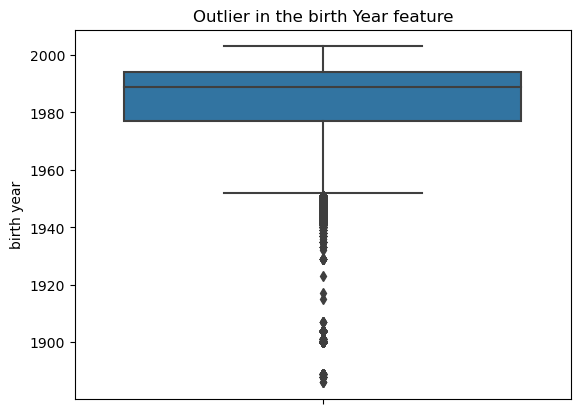

In [396]:
plt.title("Outlier in the birth Year feature")
sns.boxplot(y=df_bike_data["birth year"]);

Remove the Outliers in the **birth Year** Feature

- Assumption is the year 1952

In [397]:
df_bike_data_outliers_birth_year = df_bike_data[df_bike_data['birth year'] < 1977]

df_bike_data = df_bike_data[df_bike_data['birth year'] >= 1977]

In [398]:
print(f'The outliers {df_bike_data_outliers_birth_year.shape}')
print(f'The Data Without outliers {df_bike_data.shape}')

The outliers (624835, 20)
The Data Without outliers (1897936, 20)


Visualising the data without the outliers - **birth Year**

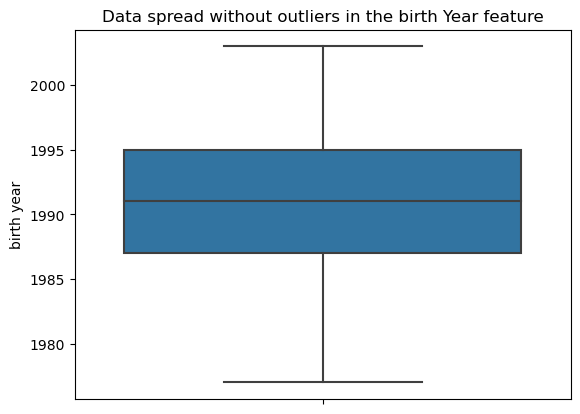

In [399]:
plt.title("Data spread without outliers in the birth Year feature")
sns.boxplot(y=df_bike_data["birth year"]);

### Outliers - **Trip Duration**

Detect outliers in the **tripduration** Feature

In [400]:
detect_outliers(df_bike_data['tripduration'])

,0
First Quartile q1,397.0
Third Quartile q3,1080.0
Interquartile range IQR,683.0
Lower bound,-627.5
Upper bound,2104.5


Visualize the outliers in the **tripduration** Feature using the **box plot**

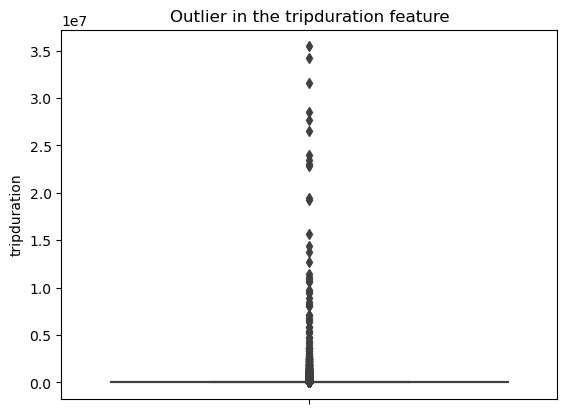

In [401]:
plt.title("Outlier in the tripduration feature")
sns.boxplot(y=df_bike_data["tripduration"]);

Remove the Outliers in the **tripduration** Feature

- Assumption is the tripduration ```<=``` 2105

In [402]:
df_bike_data_outliers_trip_duration = df_bike_data[df_bike_data['tripduration'] > 2000]

df_bike_data = df_bike_data[df_bike_data['tripduration'] <= 2000]

In [403]:
print(f'The outliers tripduration: {df_bike_data_outliers_trip_duration.shape}')
print(f'The Data Without outliers tripduration: {df_bike_data.shape}')

The outliers tripduration: (113756, 20)
The Data Without outliers tripduration: (1784180, 20)


Visualising the data without the outliers - **tripduration**

**All outliers are removed**
Outliers are removed based on the box plot visualizations

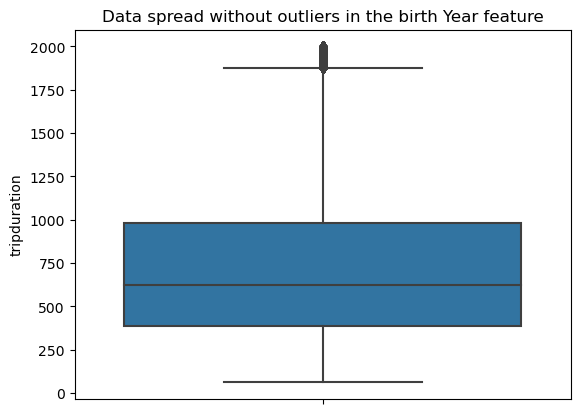

In [404]:
plt.title("Data spread without outliers in the birth Year feature")
sns.boxplot(y=df_bike_data["tripduration"]);

Renaming the Columns to camelCase

In [405]:
df_bike_data.head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startTimeDate,startTripMonth,startTripDay,startTripDayOfWeek,userAge
0,371,2019-01-01 00:09:13.798,2019-01-01 00:15:25.3360,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1987,1,2019-01-01,1,1,1,32


In [406]:
# Rename Columns to common format - e.g camelCase
df_bike_data = df_bike_data.rename(columns={'tripduration': 'tripDuration',
                   'starttime': "startTime",
                   'stoptime': 'stopTime',
                   'start station id': 'startStationId',
                   'start station name': 'startStationName',
                   'start station latitude': 'startStationLatitude',
                   'start station longitude': 'startStationLongitude',
                   'end station id': 'endStationId',
                   'end station name': 'endStationName',
                   'end station latitude': 'endStationlatitude',
                   'end station longitude': 'endStationLongitude',
                   'bikeid': 'bikeId',
                   'usertype': 'userType',
                   'birth year': 'birthYear',
                   'gender': 'gender',
                   'startTimeDate': 'startTimeDate',
                   'startTripMonth': 'startTripMonth',
                   'startTripDay': 'startTripDay',
                   'startTripDayOfWeek': 'startTripDayOfWeek',
                   'userAge': 'userAge'
                  })

df_bike_data.tail(1)

,tripDuration,startTime,stopTime,startStationId,startStationName,startStationLatitude,startStationLongitude,endStationId,endStationName,endStationlatitude,endStationLongitude,bikeId,userType,birthYear,gender,startTimeDate,startTripMonth,startTripDay,startTripDayOfWeek,userAge
92205,397,2019-12-31 23:54:58.391,2020-01-01 00:01:35.4790,386,Sennott Park Broadway at Norfolk Street,42.368605,-71.099302,228,One Memorial Drive,42.361619,-71.080436,4483,Subscriber,1994,1,2019-12-31,12,31,1,25


Remove the starttime and startTimeDate Features

In [407]:
df_bike_data.drop(['startTime', 'startTimeDate'], axis=1, inplace=True)

In [408]:
df_bike_data.head(1)

,tripDuration,stopTime,startStationId,startStationName,startStationLatitude,startStationLongitude,endStationId,endStationName,endStationlatitude,endStationLongitude,bikeId,userType,birthYear,gender,startTripMonth,startTripDay,startTripDayOfWeek,userAge
0,371,2019-01-01 00:15:25.3360,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1987,1,1,1,1,32


Remove trips that were made within the same station, since they do not cause imbalance at the station

In [409]:
bikes_same_dest = df_bike_data[df_bike_data['startStationId'] != df_bike_data['endStationId']]

In [410]:
bikes_same_dest.head(5)

,tripDuration,stopTime,startStationId,startStationName,startStationLatitude,startStationLongitude,endStationId,endStationName,endStationlatitude,endStationLongitude,bikeId,userType,birthYear,gender,startTripMonth,startTripDay,startTripDayOfWeek,userAge
0,371,2019-01-01 00:15:25.3360,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1987,1,1,1,1,32
1,264,2019-01-01 00:38:20.8800,117,Binney St / Sixth St,42.366162,-71.086883,189,Kendall T,42.362428,-71.084955,4142,Subscriber,1990,1,1,1,1,29
2,458,2019-01-01 00:49:33.2730,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1628,Subscriber,1977,1,1,1,1,42
3,364,2019-01-01 00:49:37.4260,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,334,Mass Ave at Hadley/Walden,42.391210,-71.122608,2969,Subscriber,1993,1,1,1,1,26
4,681,2019-01-01 01:01:17.7010,73,Harvard Square at Brattle St / Eliot St,42.373231,-71.120886,367,Vassal Lane at Tobin/VLUS,42.383932,-71.139613,3469,Subscriber,1979,2,1,1,1,40


### Grouping the dataset
Since the problem statement requires to determine the bike count at each station

**Assumption**
1. The Assumption taken into account is the total count of bikes at each station
 at a given point in time.

2. So we group the dataset by the ```stationStartName(stationStartId)```, ```startTripMonth```,
```startTripDayOfWeek``` and ```startTimeDate```

3. We Take the count of the ```bikeId```, the average of the ```userAge```,  the count of the
```trips per station``` and the average ```tripDuration```

In [411]:
# Group the data by the groups from the assumptions
category_groups = df_bike_data.groupby(["startStationId", "startTripMonth", "startTripDayOfWeek", "startTripDay"])

# Calculate the desired statistics
stats = category_groups.agg({"userAge": "mean", "tripDuration": "mean", "startStationName": "count", "bikeId": "nunique"})

# Rename the columns
df_data_grouped = stats.rename(columns={
                   'startStationId': 'startStationId',
                   'startTripMonth': "startTripMonth",
                   'startTripDayOfWeek': "startTripDayOfWeek",
                   'startTripDay': "startTripDay",
                   'tripDuration': 'averageTripDuration',
                   'startStationName': 'numberOfTrips',
                   'userAge': 'averageUserAge', 
                   'bikeId': 'numberOfBikes'
                  })

# View the resulting DataFrame
df_data_grouped.head(1)

,,,,averageUserAge,averageTripDuration,numberOfTrips,numberOfBikes
startStationId,startTripMonth,startTripDayOfWeek,startTripDay,,,,
1,1,0,7,25.0,839.0,1,1


In [412]:
df_data_grouped.to_csv('grouped_stats.csv')

df = df_data_grouped.reset_index()

data_grouped = df.copy()

print(data_grouped.shape)

(88760, 8)


In [413]:
data_grouped.tail(5)

,startStationId,startTripMonth,startTripDayOfWeek,startTripDay,averageUserAge,averageTripDuration,numberOfTrips,numberOfBikes
88755,446,12,6,1,23.636364,742.090909,11,11
88756,446,12,6,8,22.571429,749.714286,14,14
88757,446,12,6,15,20.684211,548.210526,19,17
88758,446,12,6,22,23.444444,738.111111,9,7
88759,446,12,6,29,32.000000,758.000000,4,4


In [414]:
data_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88760 entries, 0 to 88759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   startStationId       88760 non-null  int64  
 1   startTripMonth       88760 non-null  int64  
 2   startTripDayOfWeek   88760 non-null  int64  
 3   startTripDay         88760 non-null  int64  
 4   averageUserAge       88760 non-null  float64
 5   averageTripDuration  88760 non-null  float64
 6   numberOfTrips        88760 non-null  int64  
 7   numberOfBikes        88760 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 5.4 MB


The correlation matrix for the reduced dataset

In [415]:
data_grouped.corr()

,startStationId,startTripMonth,startTripDayOfWeek,startTripDay,averageUserAge,averageTripDuration,numberOfTrips,numberOfBikes
startStationId,1.000000,0.115696,0.001901,0.005448,0.009486,0.084106,-0.242526,-0.245603
startTripMonth,0.115696,1.000000,0.006339,-0.008990,-0.150797,0.030044,0.106592,0.108411
startTripDayOfWeek,0.001901,0.006339,1.000000,0.005624,-0.134483,0.053636,-0.085674,-0.090681
startTripDay,0.005448,-0.008990,0.005624,1.000000,-0.007347,0.001148,-0.008547,-0.008338
averageUserAge,0.009486,-0.150797,-0.134483,-0.007347,1.000000,-0.014789,-0.140048,-0.136958
averageTripDuration,0.084106,0.030044,0.053636,0.001148,-0.014789,1.000000,-0.138954,-0.137353
numberOfTrips,-0.242526,0.106592,-0.085674,-0.008547,-0.140048,-0.138954,1.000000,0.998427
numberOfBikes,-0.245603,0.108411,-0.090681,-0.008338,-0.136958,-0.137353,0.998427,1.000000


The Correlation Heatmap for the reduced dataset

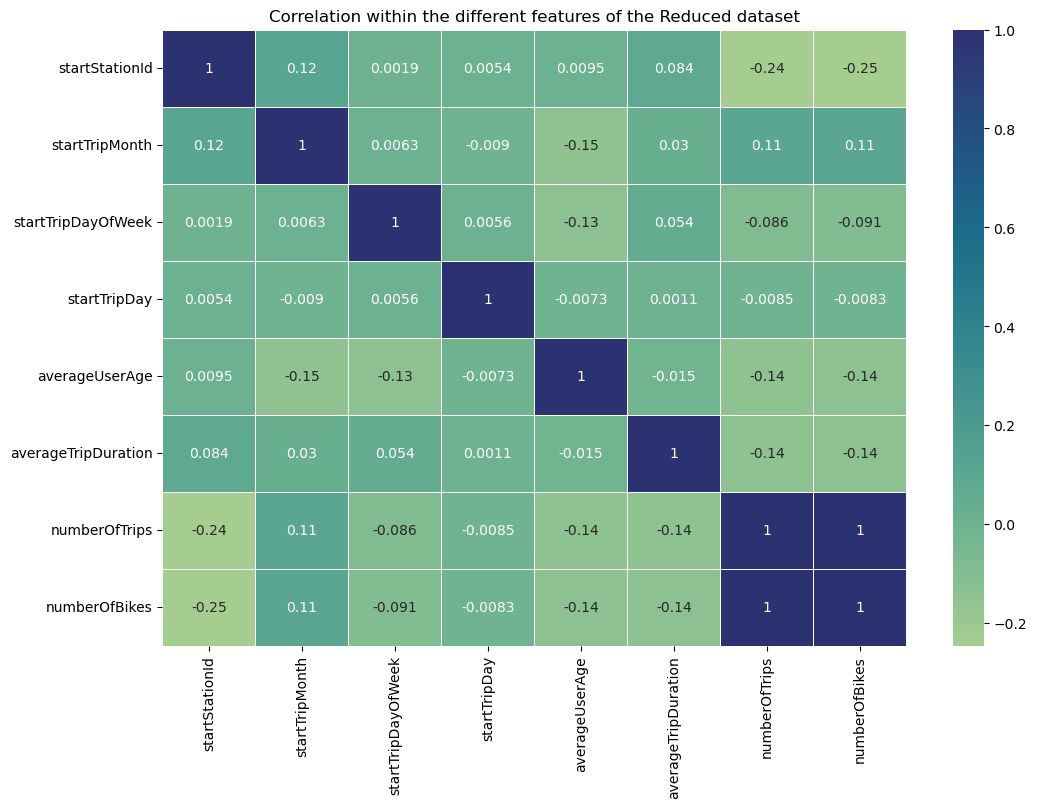

In [416]:
# Heatmap
plt.figure(figsize=(12,8))
plt.title("Correlation within the different features of the Reduced dataset")
plt.xlabel('Features')
plt.ylabel('Features')
sns.heatmap(data_grouped.corr(), cbar=True, linewidths=0.5, cmap="crest", annot=True)
plt.show();

### Drop the **numberOfTrips**

This feature will not be used

In [417]:
data_grouped = data_grouped.drop('numberOfTrips', axis=1)

### Summarizations & Visualising the reduced/grouped dataset

##### Ploting the relationship among the features

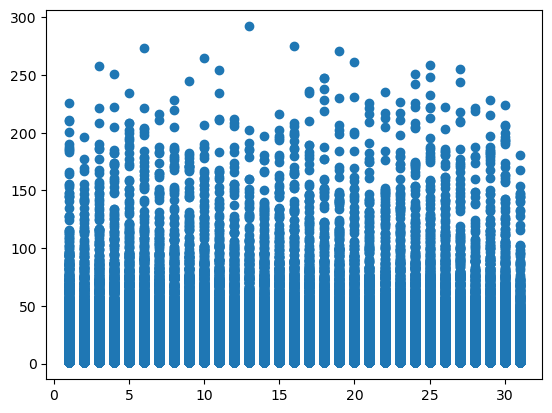

In [418]:
fig, ax = plt.subplots()
ax.scatter(data_grouped["startTripDay"], data_grouped["numberOfBikes"]);

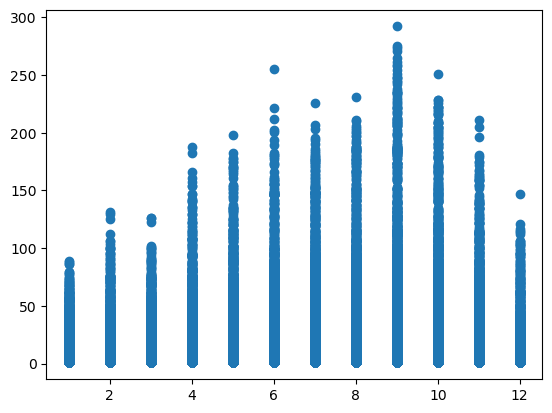

In [419]:
fig, ax = plt.subplots()
ax.scatter(data_grouped["startTripMonth"], data_grouped["numberOfBikes"]);

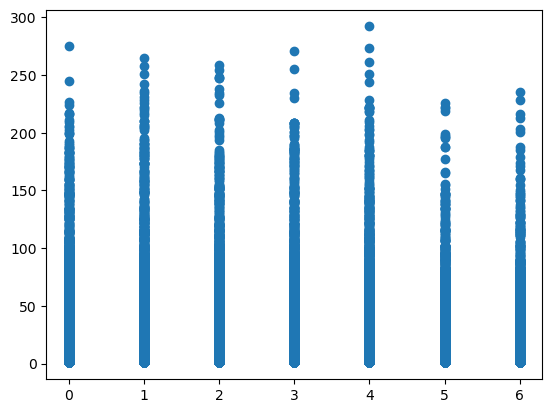

In [420]:
fig, ax = plt.subplots()
ax.scatter(data_grouped["startTripDayOfWeek"], data_grouped["numberOfBikes"]);

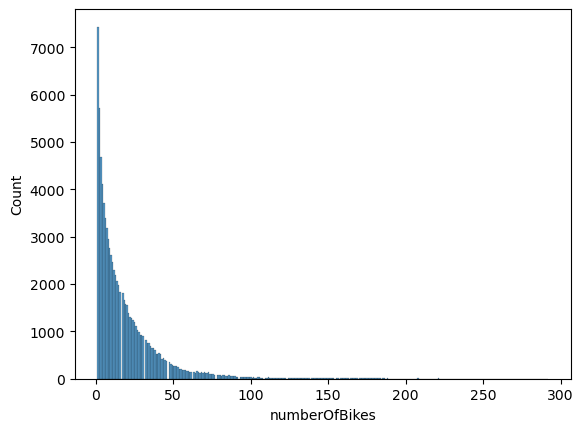

In [421]:
# Frequency of the number of bikes
sns.histplot(data=data_grouped, x="numberOfBikes");

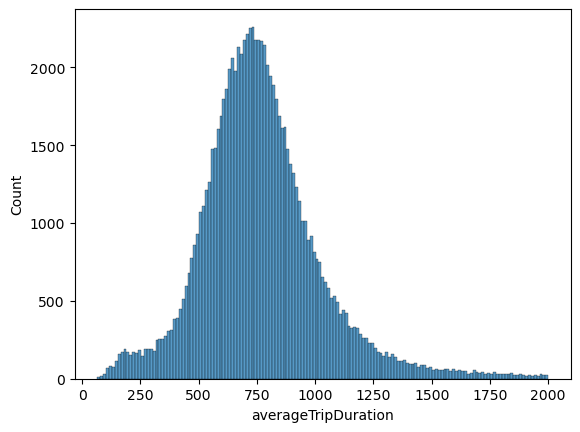

In [422]:
# Frequency for the number of trips

sns.histplot(data=data_grouped, x="averageTripDuration");

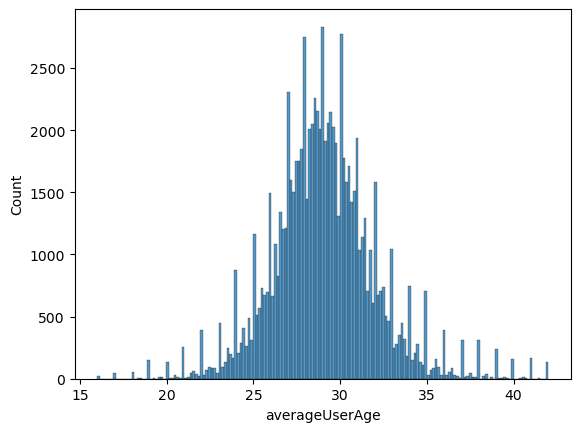

In [423]:
# Frequency of average user age

sns.histplot(data=data_grouped, x="averageUserAge");

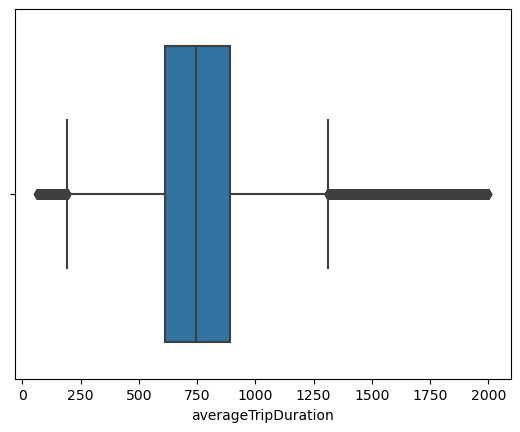

In [424]:
sns.boxplot(x=data_grouped["averageTripDuration"]);

<AxesSubplot: >

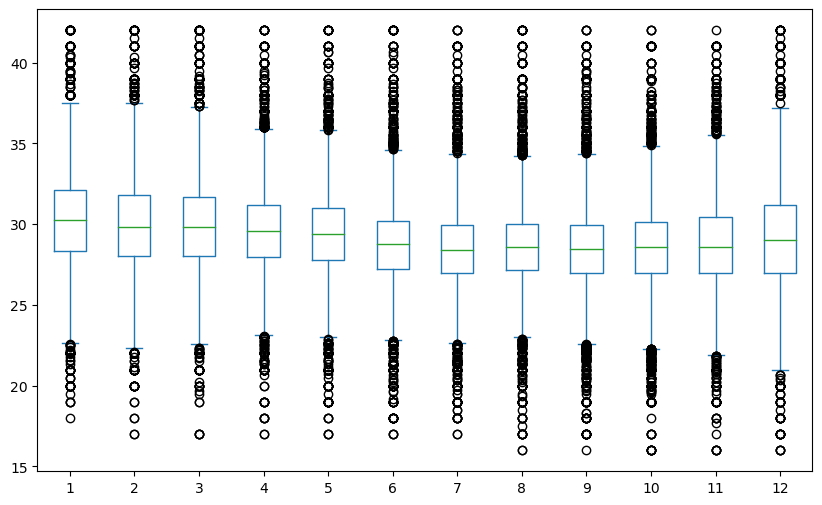

In [425]:

data_grouped.pivot(columns='startTripMonth', values='averageUserAge').plot(kind = 'box', figsize = (10, 6))


### Building the ML model

Build a Linear Regression Model

In [438]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into train and validation sets
df_train, df_validate = train_test_split(data_grouped, train_size=0.8)

# Select the features and target variables
X = df_train.drop(['numberOfBikes'], axis=1)
y = df_train['numberOfBikes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Create the linear regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train, y_train)

# Predict the target for test data
y_pred = lin_reg.predict(X_test)


Validating the model

In [427]:
df_validate.head(1)

,startStationId,startTripMonth,startTripDayOfWeek,startTripDay,averageUserAge,averageTripDuration,numberOfBikes
26390,90,5,6,26,28.407407,851.222222,27


In [428]:
# Split data into X & y
X_train, y_train = df_train.drop("numberOfBikes", axis=1), df_train["numberOfBikes"]

X_valid, y_valid = df_validate.drop("numberOfBikes", axis=1), df_validate['numberOfBikes']

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((71008, 6), (71008,), (17752, 6), (17752,))

### Evaluation Function

In [454]:
# Evaluation function
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create function to evaluate model on a few different levels
def display_model_scores(model):
    
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)

    model_scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_valid, val_preds),
        "Training R^2": r2_score(y_train, train_preds),
        "Valid R^2": r2_score(y_valid, val_preds)    
    }
        
    return model_scores

#### Testing the model

In [455]:
lin_reg_model = LinearRegression(n_jobs=1)

In [456]:
lin_reg_model.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [457]:
lin_reg_model.score(X_test, y_pred)

1.0

In [458]:
display_model_scores(lin_reg_model)

{'Training MAE': 14.091967258148765,
 'Valid MAE': 14.06308594677863,
 'Training R^2': 0.11816975534088514,
 'Valid R^2': 0.1194520148506556}

In [439]:
lin_reg.score(X_test, y_pred)

1.0

The Coefficent and intercept

In [447]:
# Print the intercept and coef

print(f'Intercept: {lin_reg.intercept_}')
print(f'Coefficent: {lin_reg.coef_}')

Intercept: 62.41163364193601
Coefficent: [-0.04661305  0.8611549  -1.18943023 -0.01997952 -1.0001346  -0.01016346]


Evaluate Linear Regression Model

In [225]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluating the model using Mean Absolute Error - (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Evaluating the model using Mean Squared Error - (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Evaluating the model using R-squared score - R2
r2 = r2_score(y_test, y_pred)
print(f'R-squared score: {r2}')

Mean Absolute Error: 0.4585619361056786
Mean Squared Error: 0.5496956046283885
R-squared score: 0.9960833521776181


Standardizing and Normalizing the datasets

Standardization

In [233]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_test)
X_std_linreg = scaler.transform(X)

Fit the model Using Standardised training set

In [228]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_std_linreg, y, test_size=0.2, random_state=42)

# Create the linear regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train, y_train)

# Predict the target for test data
y_pred = lin_reg.predict(X_test)

Evaluate the model using Standised X

In [237]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared score: {r2}')

Mean Absolute Error: 0.46240539489210486
Mean Squared Error: 0.5489526087314945
R-squared score: 0.9960886461134566


Normalization

In [230]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(X_test)
X_norm_lin_reg = min_max_scaler.transform(X)

Fit the model using Normalized data

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X_std_linreg, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

In [ ]:
lin_reg.score()

Evaluate the model using Normalised data

In [232]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared score: {r2}')

Mean Absolute Error: 0.46240539489210486
Mean Squared Error: 0.5489526087314945
R-squared score: 0.9960886461134566


Mean Absolute Error (MAE) is the average absolute difference between the predicted values and the actual values. It gives an idea of the magnitude of the error, but not the direction (e.g. over or underprediction)
Mean Squared Error (MSE) is the average of the squared differences between the predicted values and the actual values. It gives an idea of the magnitude of the error, and also the direction.
R-squared score (R2) is a measure of how well the model fits the data. It ranges from 0 to 1, where 1 is a perfect fit, and 0 is a poor fit. A high R-squared score means that the model explains a large portion of the variance in the target variable.

> This code creates a scatter plot using the scatter function from matplotlib, and plots the true values of the target variable on the x-axis and the predicted values on the y-axis. Then, add the x and y labels and a title to the plot. Finally, use the show() function to display the plot.

> If the model is working well, the points in the plot should be close to the line y = x, that is the points should be aligned with the line of identity. If the points are far from the line it means that the model is not good enough.

/var/folders/jx/4wj38svs3nb6_35h0g9039mm0000gn/T/ipykernel_13302/1365094164.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot([point_1, point_2], [point_1, point_2], 'b-', color="red")


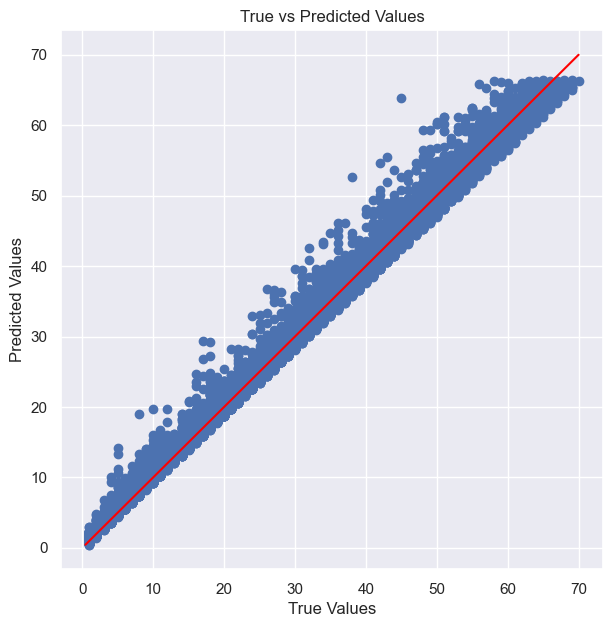

In [133]:
import matplotlib.pyplot as plt

# Create a scatter plot of the true values versus the predicted values
plt.scatter(y_test, y_pred)
point_1 = max(max(y_pred), max(y_test))
point_2 = min(min(y_pred), min(y_test))
plt.plot([point_1, point_2], [point_1, point_2], 'b-', color="red")

# Add labels and a title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')

# Display plot
plt.show();

> This code first calculates the residuals by subtracting the predicted values from the true values. Then, it creates a scatter plot using the scatter function from matplotlib, and plots the predicted values on the x-axis and the residuals on the y-axis. After that, add the x and y labels and a title to the plot. Finally, use the show() function to display the plot.



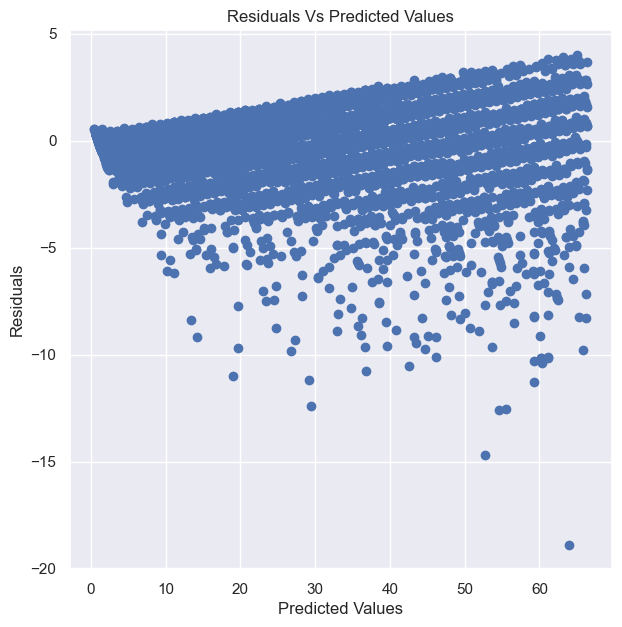

In [137]:
# Calculating the residuals
residuals = y_test - y_pred

# Plotting residuals Vs predicted values
plt.scatter(y_pred, residuals)

# Labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Vs Predicted Values')

# Display the plot
plt.show()

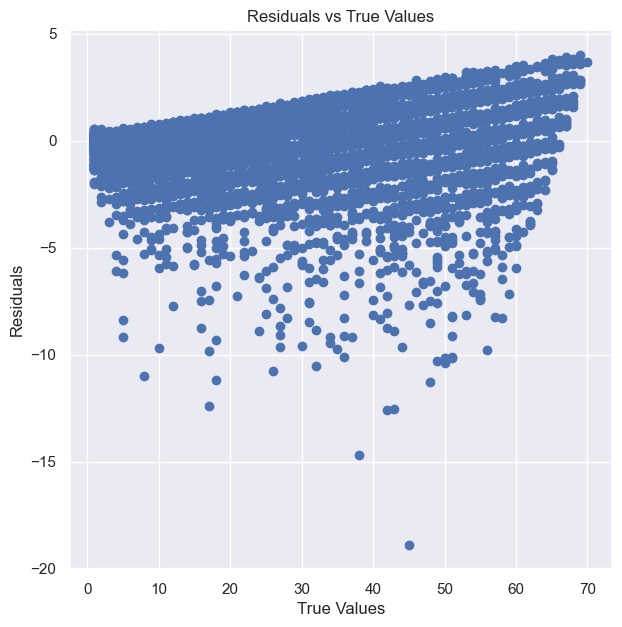

In [138]:
# Plotting Residuals Vs true values
plt.scatter(y_test, residuals)

# Labels and title
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residuals vs True Values')

# Display the plot
plt.show()

### Hypertuning Linear **LinearRegression Model**

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Defining the range of values for the regularization strength
param_grid = {'normalize': [True, False], 'fit_intercept': [True, False]}

# Create the linear regression model instance
linear_reg = LinearRegression()

# Create the grid search instance
grid_search = GridSearchCV(lin_reg, param_grid, cv=5, return_train_score=True)


Fitting the model on the original data

In [163]:
# Fitting the grid search
grid_search.fit(X, y)

# Best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'fit_intercept': True, 'normalize': False}
Best Score: 0.9930075257726015


Fitting the grid Search on standardised data

In [164]:
# Fitting the grid search
grid_search.fit(X_std_linreg, y)

# Best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'fit_intercept': True, 'normalize': True}
Best Score: 0.9930075257726013


Fitting the grid Search on Normalised data

In [161]:
# Fitting the grid search
grid_search.fit(X_norm_lin_reg, y)

# Best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'fit_intercept': True, 'normalize': True}
Best Score: 0.9930075257726012


Hyperparameter **Regularization strength**

In [198]:
from sklearn.linear_model import Lasso

grid_range = np.arange(0.001, 1000)

param_grid = {'alpha': grid_range}
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X, y)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')


Best Parameters: {'alpha': 0.001}
Best Score: 0.9930075138869073


Explain the Logistic Regression Model

In [260]:

class_names = X_train.columns
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [271]:
import lime
import lime.lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    X_train, 
    feature_names=class_names, 
    class_names=['numberOfBikes'], 
    verbose=True, 
    mode='regression')

exp = explainer.explain_instance(X_test[5], lin_reg.predict)
exp = exp.as_list()

exp

Intercept 24.846432101760488
Prediction_local [2.45130269]
Right: 0.8398141892396264


[('numberOfTrips <= 5.00', -21.79508767125033),
 ('3.00 < startTripDayOfWeek <= 5.00', -0.6085958911716389),
 ('averageUserAge <= 31.24', -0.500558500501366),
 ('startStationId > 330.00', 0.3982682482205006),
 ('averageTripDuration <= 722.00', 0.3280120926836208),
 ('startTripMonth <= 4.00', -0.21716769009484277)]

In [272]:
# Plot the explanation

exp.show_in_notebook(show_table=True)

AttributeError: 'list' object has no attribute 'show_in_notebook'

In [258]:
import random

In [259]:

idx = random.randint(1, len(X_test))

print("Prediction : ", lin_reg.predict(X_test[idx].reshape(1,-1)))
print("Actual :     ", Y_test[idx])

explanation = explainer.explain_instance(X_test[idx], lin_reg.predict, num_features=len(X_train.columns))
explanation

KeyError: 6267

In [257]:
len(X_test)

17066

In [ ]:
X_train

<AxesSubplot: xlabel='numberOfBikes', ylabel='totalTripDuration'>

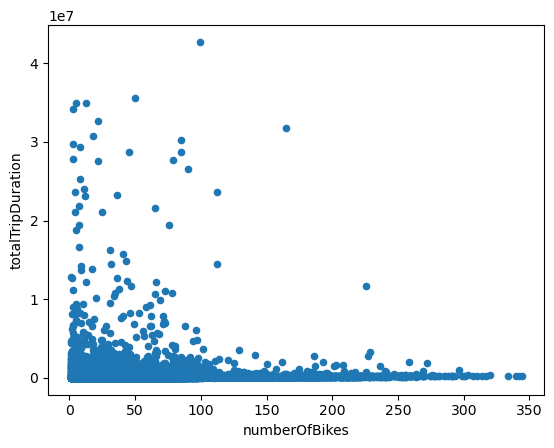

In [ ]:
df_stats.plot(kind='scatter', x='numberOfBikes', y='totalTripDuration')

<AxesSubplot: xlabel='numberOfBikes', ylabel='numberOfTrips'>

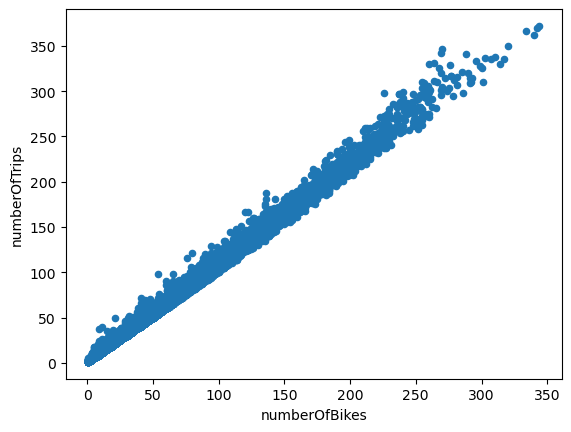

In [ ]:
df_stats.plot(kind='scatter', x='numberOfBikes', y='numberOfTrips')

<AxesSubplot: xlabel='numberOfTrips', ylabel='numberOfBikes'>

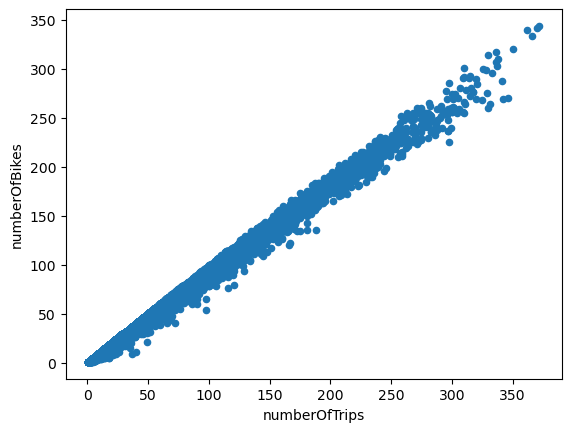

In [ ]:
df_stats.plot(kind='scatter', x='numberOfTrips', y='numberOfBikes')

<AxesSubplot: xlabel='numberOfTrips', ylabel='averageUserAge'>

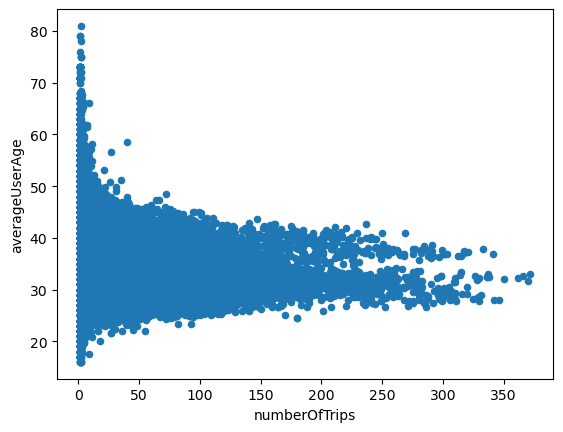

In [ ]:
df_stats.plot(kind='scatter', x='numberOfTrips', y='averageUserAge')

<AxesSubplot: ylabel='Frequency'>

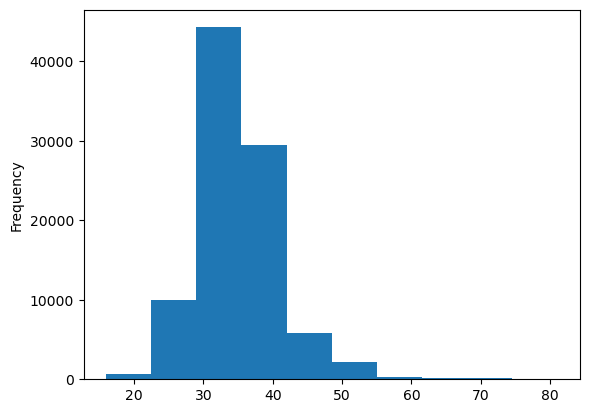

In [ ]:
df_stats['averageUserAge'].plot(kind='hist')

<AxesSubplot: ylabel='Frequency'>

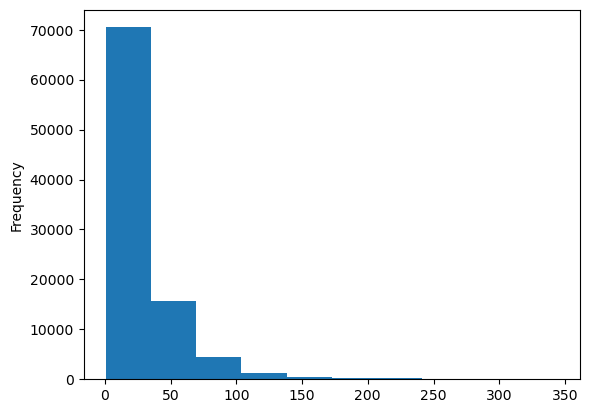

In [ ]:
df_stats['numberOfBikes'].plot(kind='hist')

<AxesSubplot: >

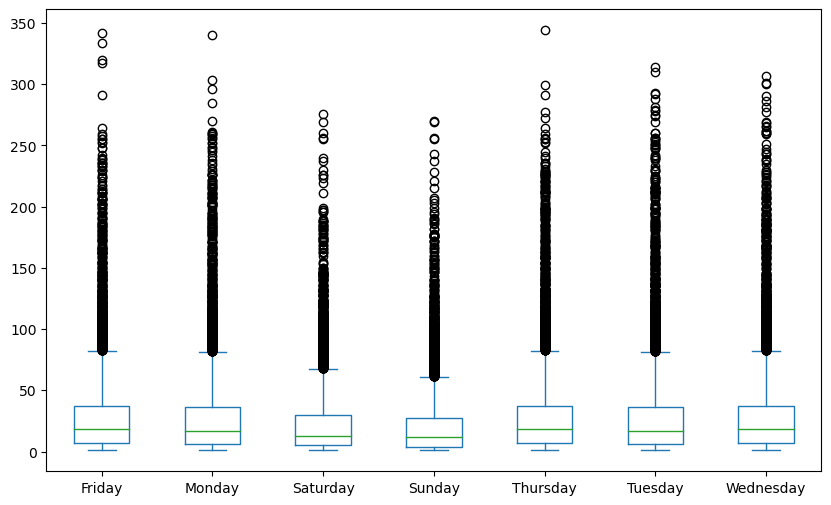

In [ ]:
df_stats.pivot(columns='weekdayOfStartTime', values='numberOfBikes').plot(kind = 'box', figsize = (10, 6))

<AxesSubplot: xlabel='startStationName'>

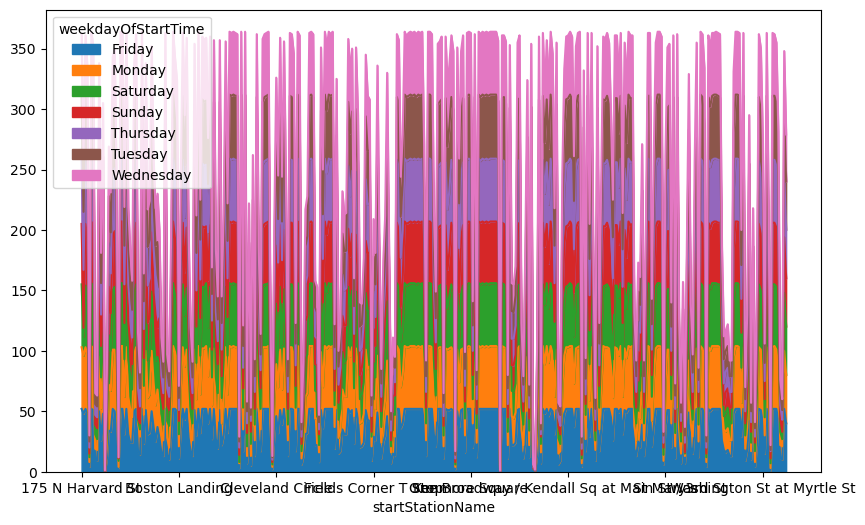

In [ ]:
data_grouped.groupby('startStationName')['weekdayOfStartTime'].value_counts().unstack().plot(kind='area', stacked=True, figsize=(10, 6))

<AxesSubplot: >

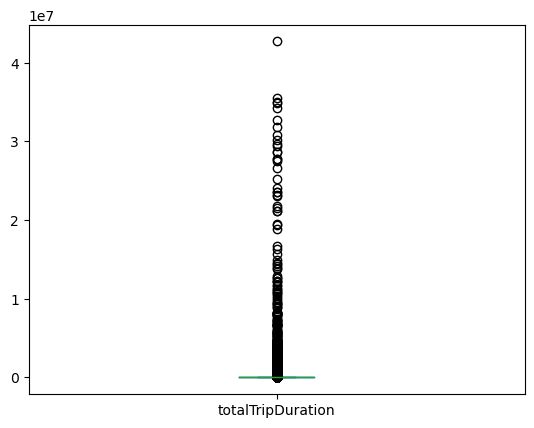

In [ ]:
# Box plot
df_stats.plot.box(y='totalTripDuration')

<AxesSubplot: >

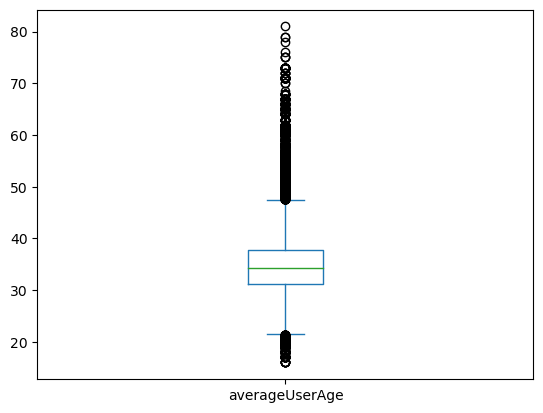

In [ ]:
# Box plot
df_stats.plot.box(y='averageUserAge')

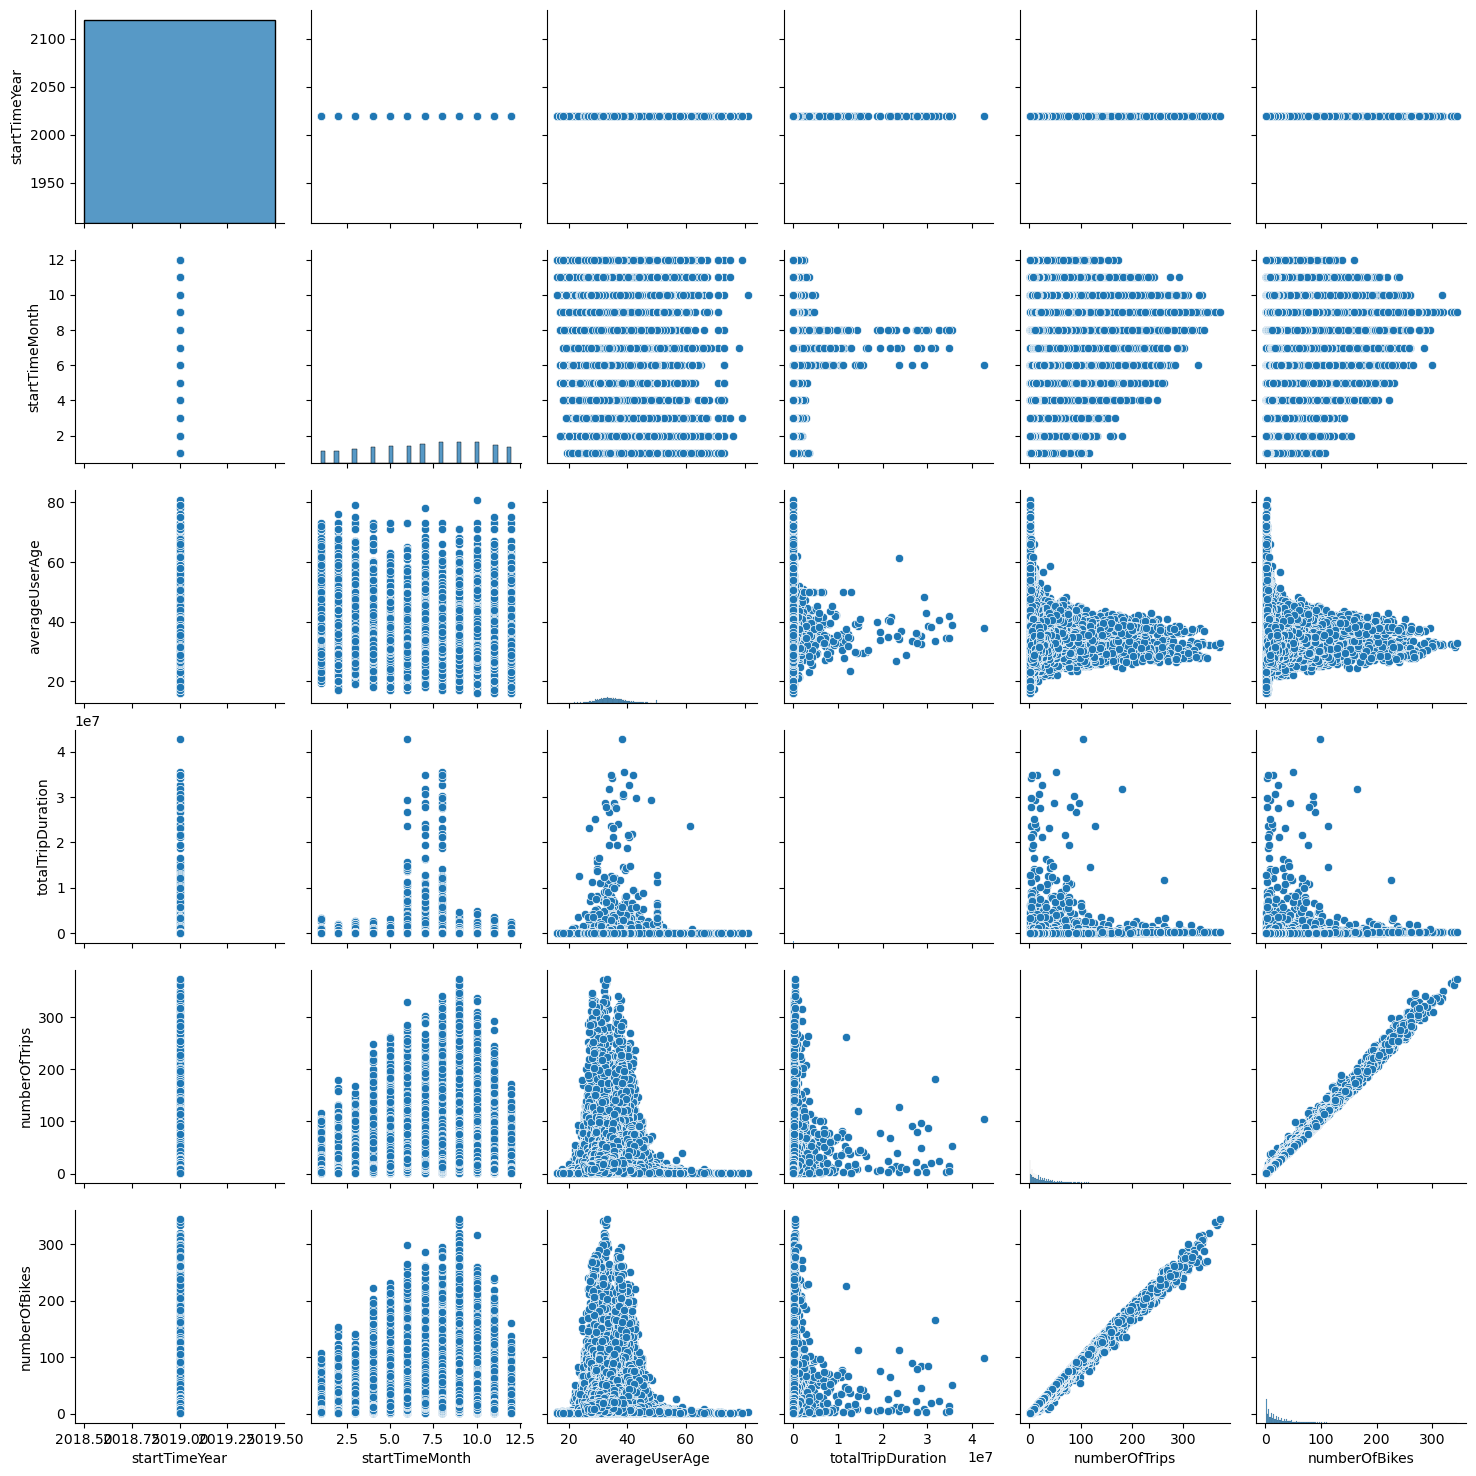

In [ ]:
# Pairplot
sns.pairplot(df_stats)